# Predator Prey

In [1]:
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk38_ivp
import matplotlib.pyplot as plt
import torch
import time


def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params
    return torch.tensor([(a * y1 - b * y1 * y2), (c * y2 * y1 - d * y2)])

t = torch.linspace(0, 200, 200)

start_t = time.time()
sol_rk38 = rk38_ivp(lotka_volterra,
                torch.tensor([15., 9.]),
                t,
                torch.tensor([0.1, 0.02, 0.01, 0.1]))
end_t = time.time()

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (/home/rakshit/deepchem/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/rakshit/deepchem/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorfl

In [ ]:
a = torch.tensor([[1, 2],
              [1, 3],   
              [2, 4]])

a + torch.rand(a.size())

tensor([[1.8216, 2.5384],
        [1.3705, 3.9186],
        [2.4280, 4.8138]])

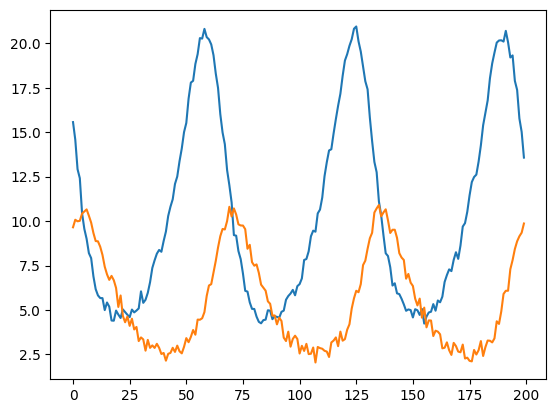

In [71]:
plt.plot(sol_rk38 + torch.rand(sol_rk38.size()))

In [3]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Define the Lotka-Volterra equations
def lotka_volterra(t, z, alpha, beta, delta, gamma):
    prey, predator = z
    dprey_dt = alpha * prey - beta * prey * predator
    dpredator_dt = delta * prey * predator - gamma * predator
    return [dprey_dt, dpredator_dt]

# Parameters
alpha = 0.1  # Prey growth rate
beta = 0.02  # Predation rate
delta = 0.01  # Predator reproduction rate
gamma = 0.1   # Predator death rate

# Initial conditions
prey_0 = 40  # Initial prey population
predator_0 = 9  # Initial predator population
z0 = [prey_0, predator_0]

# Time span for the simulation
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

import time

start_t = time.time()
# Solve the differential equations
solution = solve_ivp(lotka_volterra, t_span, z0, args=(alpha, beta, delta, gamma), t_eval=t_eval)
end_t = time.time()

print(end_t - start_t)
print(solution.y[0][-1], solution.y[1][-1])


0.016966819763183594
0.8011062811404153 2.1638119783968244


In [16]:
(sum((solution.y[1] - sol_rk38[:, 1].numpy()))**2/len(solution.y[1]))**(1/2)

0.1659590630364942

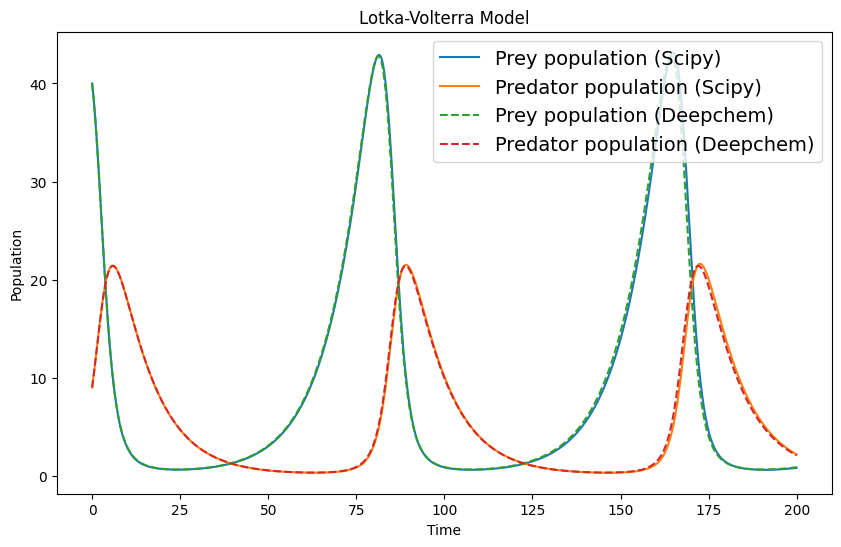

In [4]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='Prey population (Scipy)')
plt.plot(solution.t, solution.y[1], label='Predator population (Scipy)')
plt.plot(solution.t, sol_rk38[:, 0], label='Prey population (Deepchem)', linestyle="--")
plt.plot(solution.t, sol_rk38[:, 1], label='Predator population (Deepchem)', linestyle="--")
plt.title('Lotka-Volterra Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(fontsize=14)
plt.savefig('Predator-Prey Combined Plot')
plt.show()

# Parameter Estimation

In [19]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

device = 'cpu'

dataset = pd.read_csv('assets/population_data.csv')
years = torch.tensor(dataset['year'], device=device)
fish_pop = torch.tensor(dataset['fish_hundreds'], device=device)
bears_pop = torch.tensor(dataset['bears_hundreds'], device=device)
pop = torch.tensor(dataset[['fish_hundreds', 'bears_hundreds']].to_numpy(), device=device)

In [26]:
fish_pop

tensor([10.0532, 15.6857,  7.9446,  1.5011,  0.4661,  0.2729,  0.5636,  0.3538,
         0.6534,  1.6528,  3.5948,  7.6971, 14.8407, 11.6386,  2.5888,  0.3951,
         0.5884,  0.2954,  0.3132,  0.5878,  1.4049,  3.2105,  6.5404, 13.4126,
        13.9429,  3.8440,  0.6517,  0.1733,  0.5692,  0.2492,  0.6036,  1.1194,
         2.5551,  5.4476, 11.1753, 16.0066,  5.8023,  1.1926,  0.4690,  0.4601,
         0.0692,  0.6546,  1.2247,  2.1311,  4.0661,  9.3094, 15.8709,  8.9209,
         1.6430,  0.3221,  0.2456], dtype=torch.float64)

In [25]:
years_fab = years


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50.], dtype=torch.float64)

In [23]:
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp
import torch
import matplotlib.pyplot as plt


def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params

    return torch.tensor([a * y1 - b * y1 * y2, c * y2 * y1 - d * y2])


def loss_function(params, years,fish_pop, bears_pop):

    y0 = torch.tensor([fish_pop[0], bears_pop[0]])

    t = torch.linspace(years[0], years[-1], len(years))

    output = rk4_ivp(lotka_volterra, y0, t, params)

    loss = 0

    for i in range(len(years)):
        data_fish = fish_pop[i]
        model_fish = output[i,0]

        data_bears = bears_pop[i]
        model_bears = output[i,1]

        res = (data_fish - model_fish)**2 + (data_bears - model_bears)**2

        loss += res

    return(loss)

import scipy.optimize

params0 = torch.tensor([1.1, .4, .1, .4])

import time

st = time.time()
minimum = scipy.optimize.fmin(loss_function, params0, args=(years,fish_pop, bears_pop))
et = time.time()

print(et - st)

alpha_fit = minimum[0]
beta_fit = minimum[1]
delta_fit = minimum[2]
gamma_fit = minimum[3]

params = torch.tensor([alpha_fit, beta_fit, delta_fit, gamma_fit])

y0 = torch.tensor([fish_pop[0], bears_pop[0]])

t = torch.linspace(years[0], years[-1], 1000)

output_s = rk4_ivp(lotka_volterra, y0, t, params)

#print(params)
#plt.plot(t, output)
#plt.show()

Optimization terminated successfully.
         Current function value: 42.135876
         Iterations: 155
         Function evaluations: 256
6.080461025238037


In [24]:
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp
import torch
import matplotlib.pyplot as plt


def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params

    return torch.stack([a * y1 - b * y1 * y2, c * y2 * y1 - d * y2])


def loss_function(params, years,fish_pop, bears_pop):

    y0 = torch.stack([fish_pop[0], bears_pop[0]])

    t = torch.linspace(years[0], years[-1], len(years), device=device)

    output = rk4_ivp(lotka_volterra, y0, t, params)

    loss = torch.sum((output - pop) ** 2)
    loss.grad = torch.tensor(1.0, dtype=torch.float64, device=device)

    return loss, loss.grad

from deepchem.utils.differentiation_utils.optimize.minimizer import gd

params0 = torch.tensor([1.1, .4, .1, .4], device=device)

minimum = gd(loss_function, params0, params=(years, fish_pop, bears_pop),
             maxiter=155, step=1e-5, terminate=False)

alpha_fit = minimum[0]
beta_fit = minimum[1]
delta_fit = minimum[2]
gamma_fit = minimum[3]

params = torch.stack([alpha_fit, beta_fit, delta_fit, gamma_fit])

y0 = torch.stack([fish_pop[0], bears_pop[0]])

t = torch.linspace(years[0], years[-1], 1000)

output_d = rk4_ivp(lotka_volterra, y0, t, params)

#print(params)
#plt.plot(t, output.cpu())
#plt.show()

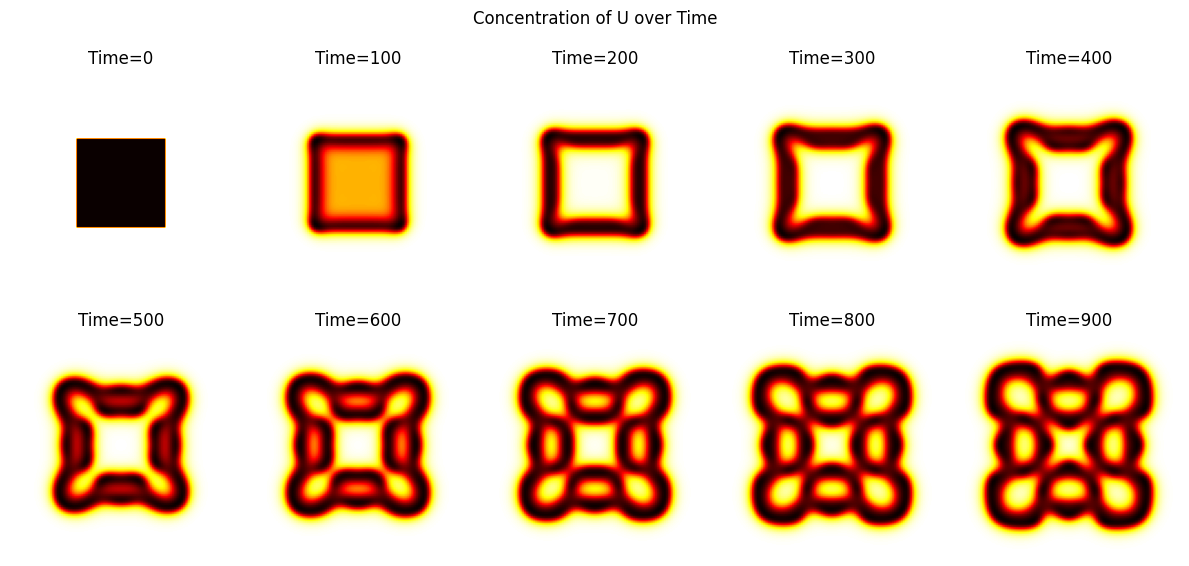

In [4]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

# Parameters
D_U = 0.16  # Diffusion coefficient for U
D_V = 0.08  # Diffusion coefficient for V
F = 0.04    # Feed rate for U
k = 0.06    # Kill rate for V

# Grid size
N = 100  # Size of the grid (N x N)
T = 1000  # Total time steps

# Initialize concentrations
U = torch.ones((N, N))  # Concentration of U
V = torch.zeros((N, N))  # Concentration of V

# Set initial conditions
U[30:70, 30:70] = 0.5
V[30:70, 30:70] = 0.25

# Function to compute the Laplacian
def laplacian(Z):
    return (
        torch.roll(Z, 1, dims=0) +
        torch.roll(Z, -1, dims=0) +
        torch.roll(Z, 1, dims=1) +
        torch.roll(Z, -1, dims=1) - 
        4 * Z
    )

# Time evolution function
def update(UV, t, params):
    U = UV[:N*N].reshape((N, N))
    V = UV[N*N:].reshape((N, N))

    dUdt = D_U * laplacian(U) - U * V**2 + F * (1 - U)
    dVdt = D_V * laplacian(V) + U * V**2 - (F + k) * V
    
    return torch.concatenate([dUdt.ravel(), dVdt.ravel()])

# Time vector
time_points = torch.linspace(0, T, T)

# Initial conditions vector
initial_conditions = torch.concatenate([U.ravel(), V.ravel()])

# Solve ODEs
solution = rk4_ivp(update, initial_conditions, time_points, [])

# Reshape solution for plotting
U_sol = solution[:, :N*N].reshape((T, N, N))
V_sol = solution[:, N*N:].reshape((T, N, N))

# Plotting the results at different time steps
plt.figure(figsize=(12, 6))
for i in range(0, T, T // 10):  # Plot every T/10 steps
    plt.subplot(2, 5, i // (T // 10) + 1)
    plt.imshow(U_sol[i], cmap='hot')
    plt.title(f'Time={i}')
    plt.axis('off')

plt.suptitle('Concentration of U over Time')
plt.tight_layout()
plt.savefig("pde.png")
plt.show()

In [34]:
import random
random.random()

0.19482156484385227

0.24577974697347313 0.16
-0.04191636469595271 0.08
0.12070290976877933 0.04
0.1858891966657742 0.06


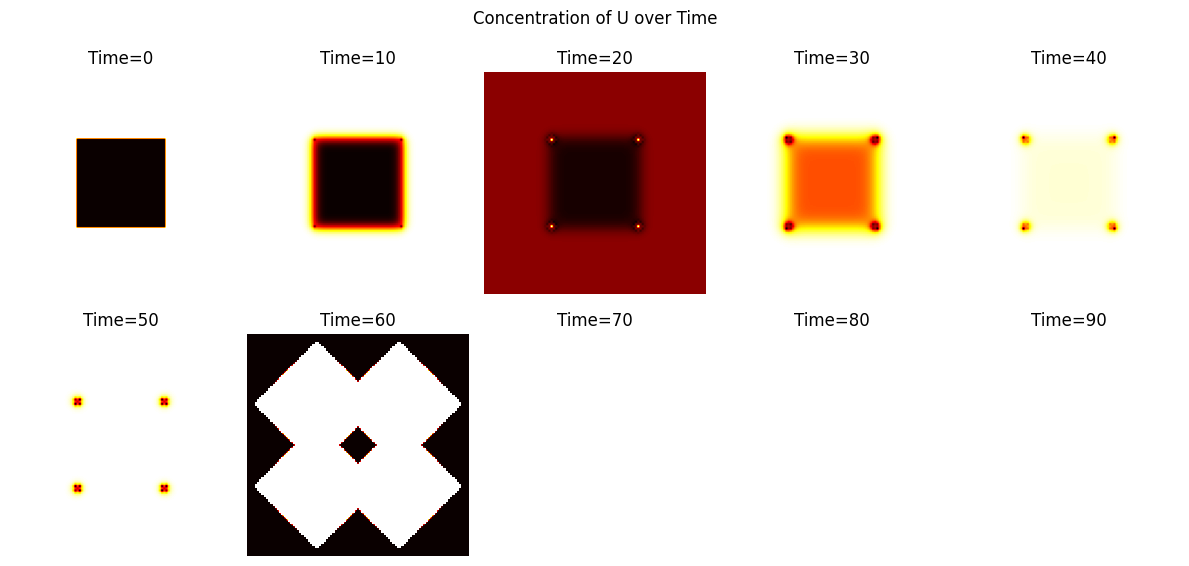

0.044430359394973834 0.16
0.07867264879726273 0.08
0.08862982574475808 0.04
0.09336599975216296 0.06


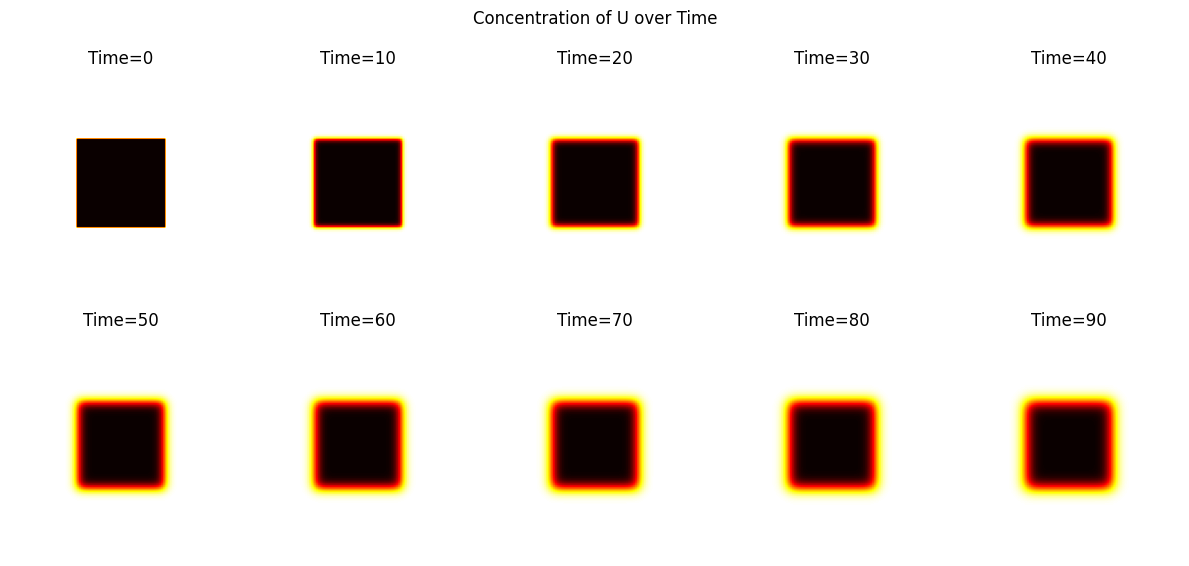

0.08427275141947274 0.16
0.143490924778715 0.08
0.02771698044405372 0.04
-0.0014430901538879642 0.06


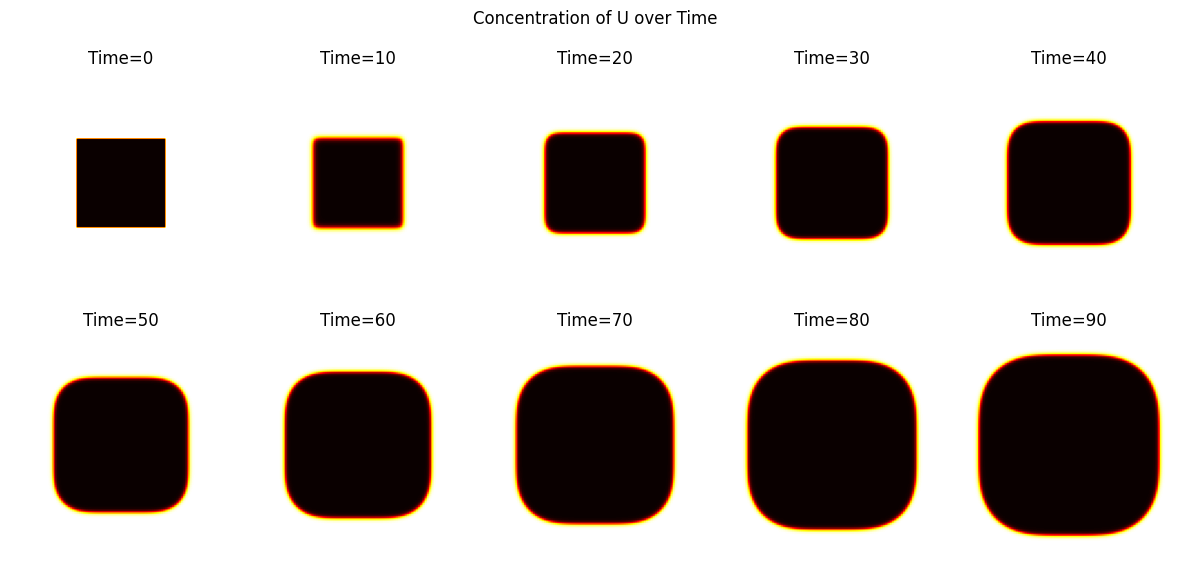

0.17264670262212947 0.16
0.13101489572558256 0.08
0.13177349428385232 0.04
0.08765137740538975 0.06


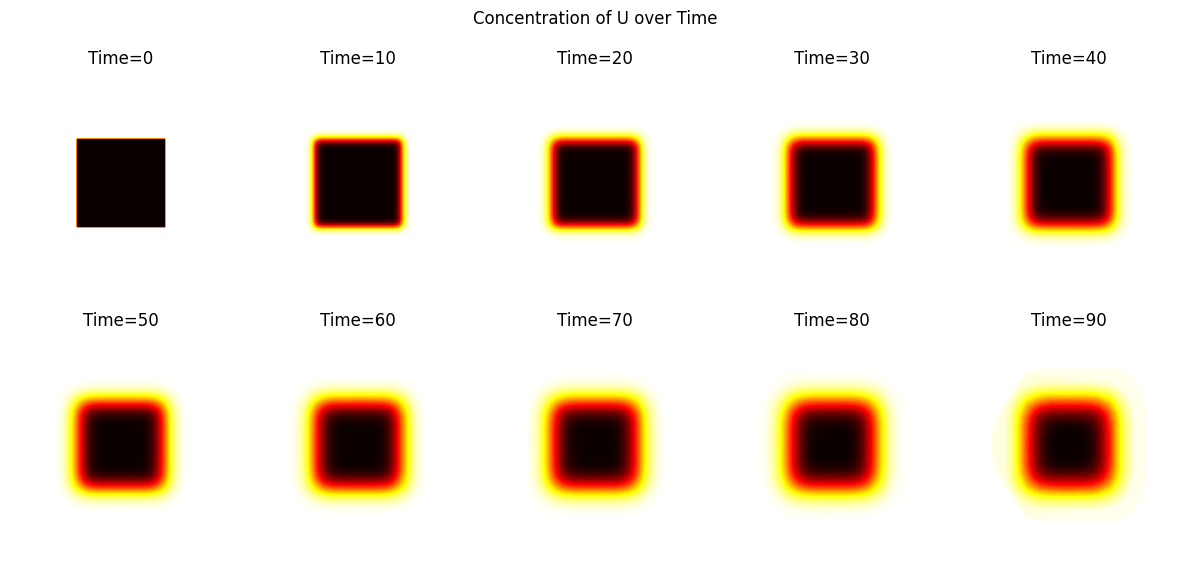

0.15810153718145223 0.16
0.15264888867762916 0.08
0.15666850457381853 0.04
0.0802210451493219 0.06


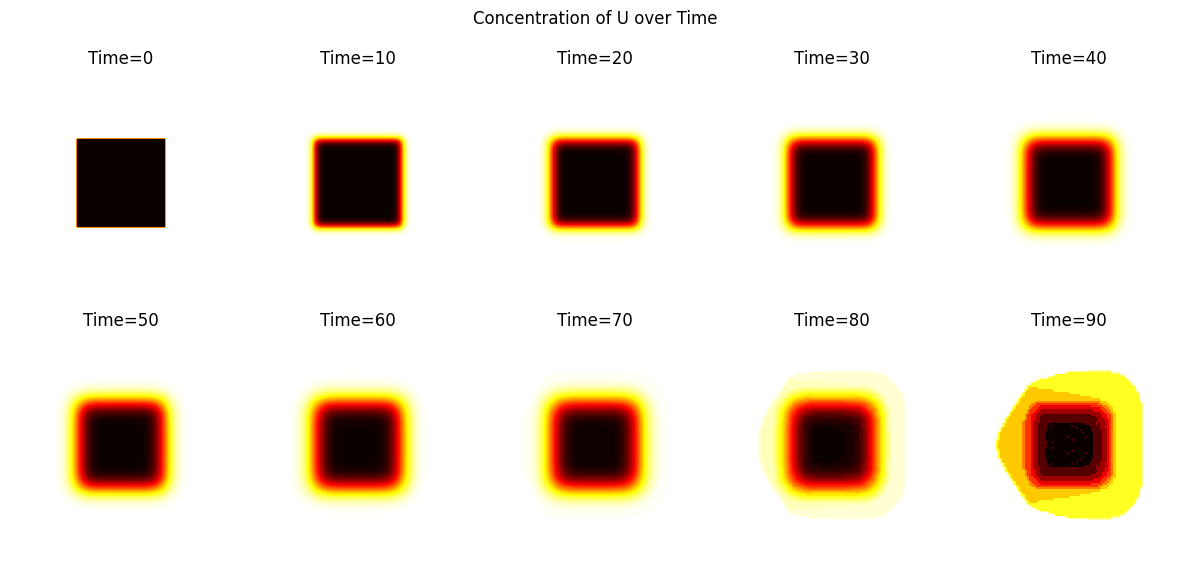

0.21956347082583147 0.16
0.13521498591868142 0.08
0.14808729103489965 0.04
0.05693974153160077 0.06


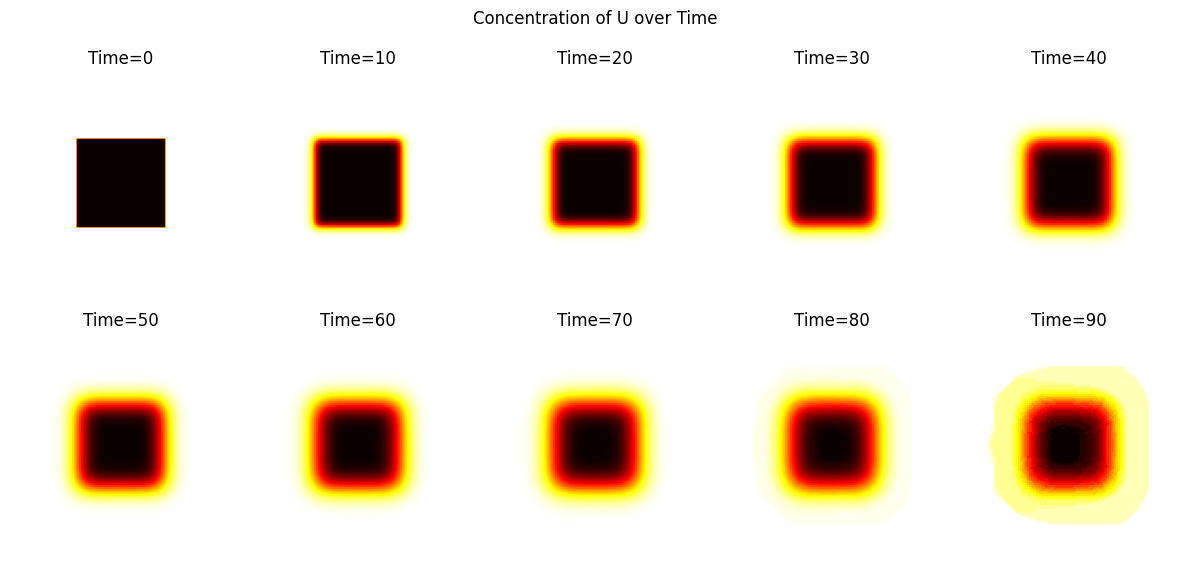

-0.07248801881204694 0.16
0.14485831046439024 0.08
0.051709737938520524 0.04
0.06574737078173484 0.06


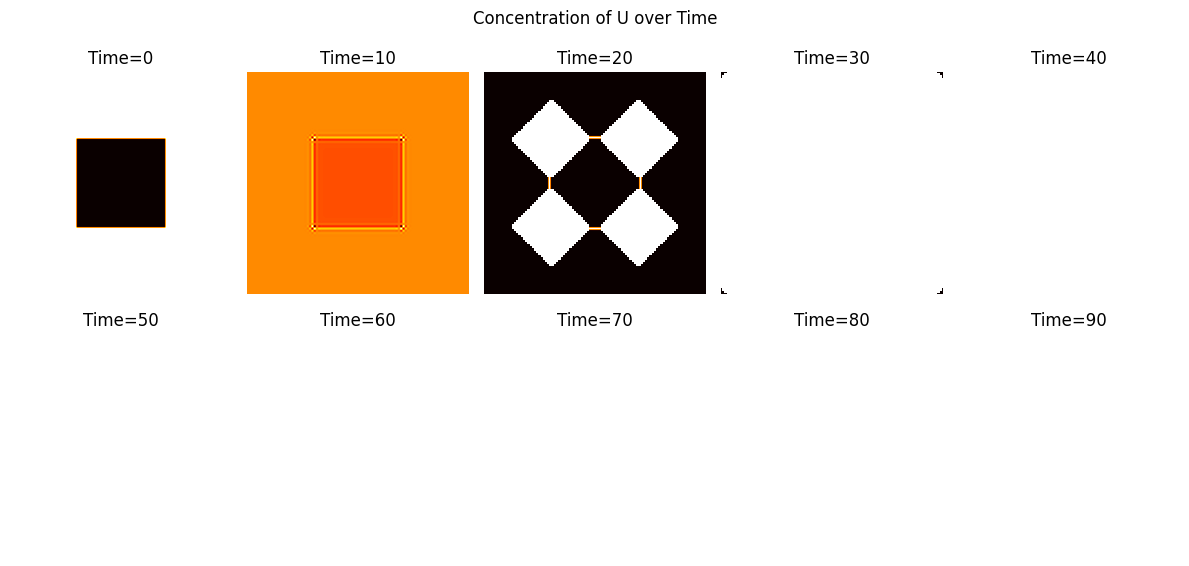

-0.06945703249809113 0.16
0.18886632885287785 0.08
0.1676014548103834 0.04
0.1724617722042431 0.06


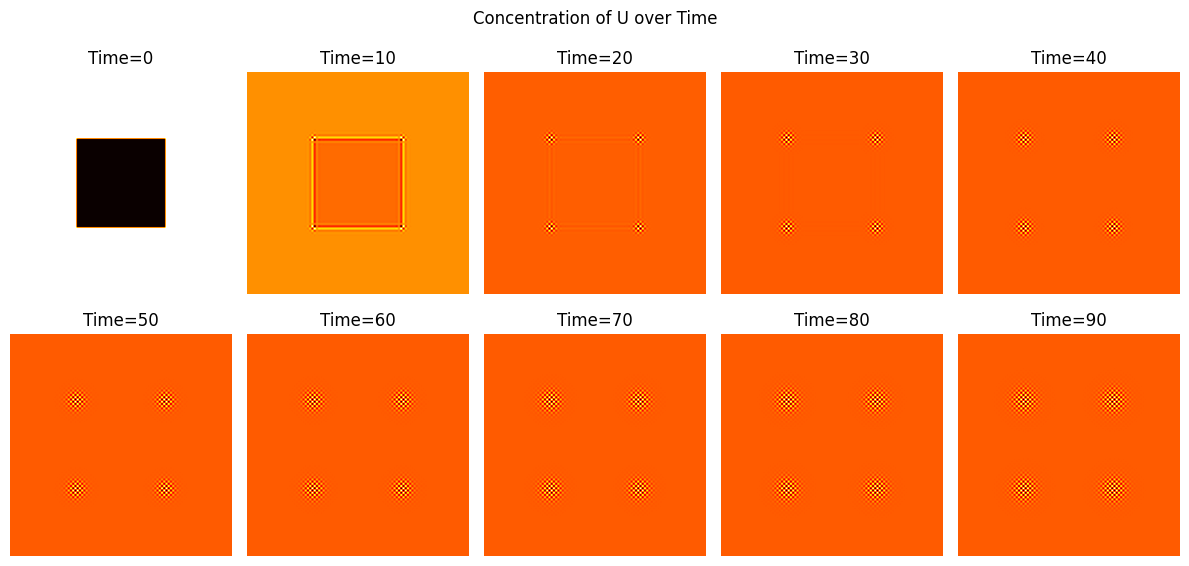

-0.07958479555955647 0.16
0.1899785900192607 0.08
0.175337339267568 0.04
0.10991539392055047 0.06


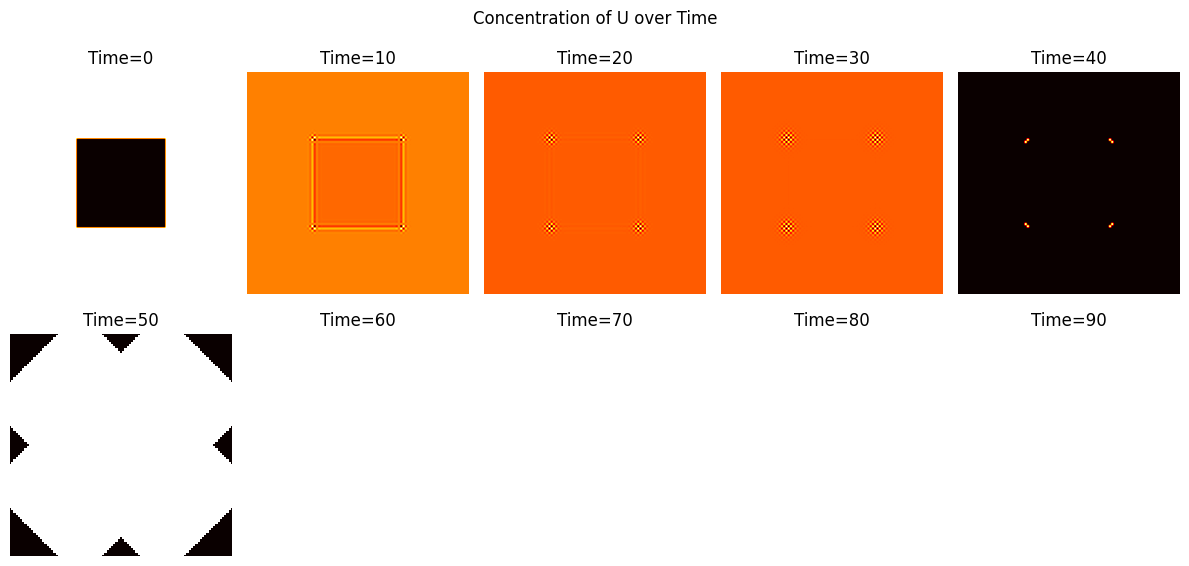

0.3138971765215074 0.16
0.02228257295639048 0.08
0.18872720728327072 0.04
0.07421699284825585 0.06


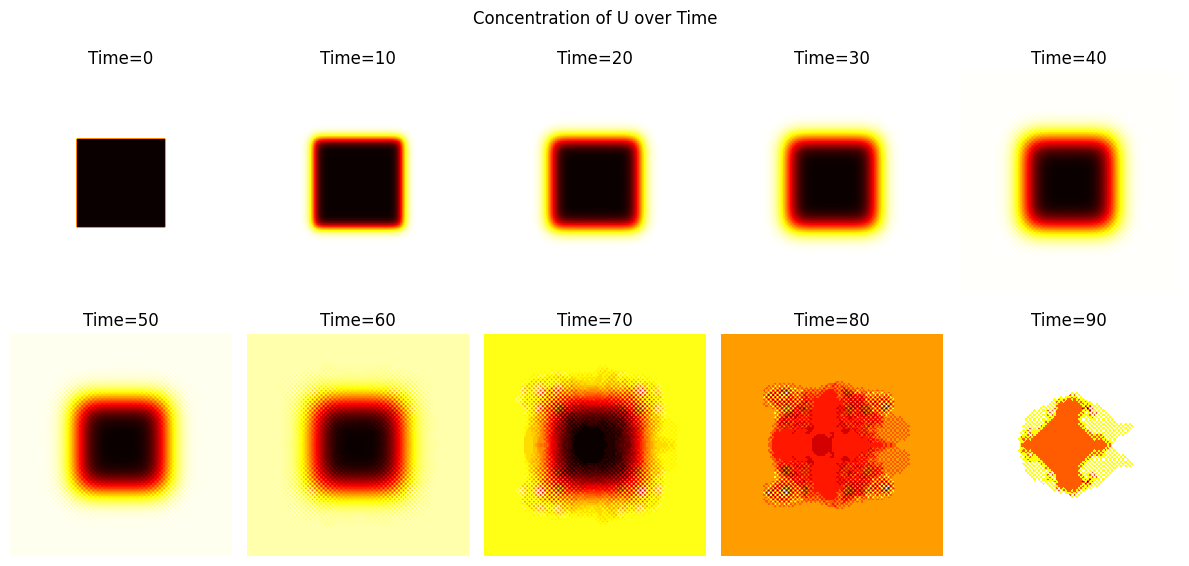

In [39]:
for i in range(10):
    import torch
    import matplotlib.pyplot as plt
    from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp
    import random


    # Parameters
    D_U = random.uniform(-0.10, 0.40)  # Diffusion coefficient for U
    D_V = random.uniform(-0.05, 0.20) # Diffusion coefficient for V
    F = random.uniform(-0.01, 0.20)   # Feed rate for U
    k = random.uniform(-0.01, 0.20)   # Kill rate for V

    print(D_U, 0.16)
    print(D_V, 0.08)
    print(F, 0.04)
    print(k, 0.06)

    # Grid size
    N = 100  # Size of the grid (N x N)
    T = 100  # Total time steps

    # Initialize concentrations
    U = torch.ones((N, N))  # Concentration of U
    V = torch.zeros((N, N))  # Concentration of V

    # Set initial conditions
    U[30:70, 30:70] = 0.6
    V[30:70, 30:70] = 0.25

    # Function to compute the Laplacian
    def laplacian(Z):
        return (
            torch.roll(Z, 1, dims=0) +
            torch.roll(Z, -1, dims=0) +
            torch.roll(Z, 1, dims=1) +
            torch.roll(Z, -1, dims=1) - 
            4 * Z
        )

    # Time evolution function
    def update(UV, t, params):
        U = UV[:N*N].reshape((N, N))
        V = UV[N*N:].reshape((N, N))

        dUdt = D_U * laplacian(U) - U * V**2 + F * (1 - U)
        dVdt = D_V * laplacian(V) + U * V**2 - (F + k) * V

        return torch.concatenate([dUdt.ravel(), dVdt.ravel()])

    # Time vector
    time_points = torch.linspace(0, T, T)

    # Initial conditions vector
    initial_conditions = torch.concatenate([U.ravel(), V.ravel()])

    # Solve ODEs
    solution = rk4_ivp(update, initial_conditions, time_points, [])

    # Reshape solution for plotting
    U_sol = solution[:, :N*N].reshape((T, N, N))
    V_sol = solution[:, N*N:].reshape((T, N, N))

    # Plotting the results at different time steps
    plt.figure(figsize=(12, 6))
    for i in range(0, T, T // 10):  # Plot every T/10 steps
        plt.subplot(2, 5, i // (T // 10) + 1)
        plt.imshow(U_sol[i], cmap='hot')
        plt.title(f'Time={i}')
        plt.axis('off')

    plt.suptitle('Concentration of U over Time')
    plt.tight_layout()
    plt.savefig(f"pde-{D_U}-{D_V}-{F}-{k}.png")
    plt.show()

# Wu-Zhang System

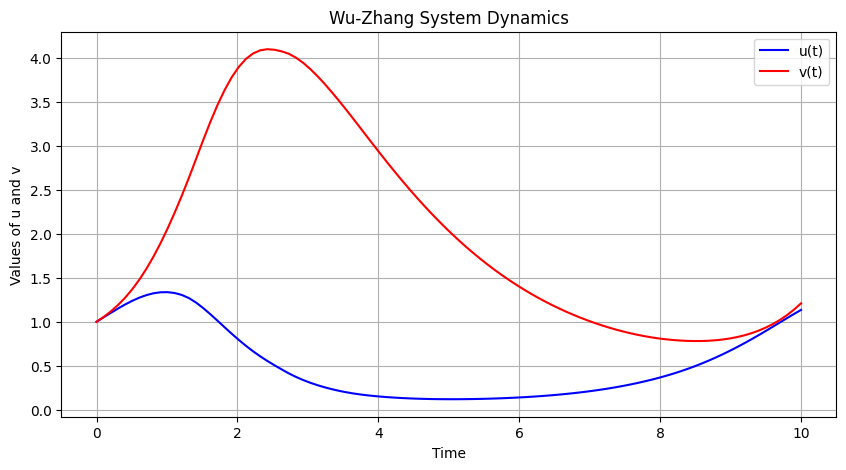

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the Wu-Zhang system as a set of ODEs
def wu_zhang_system(t, y):
    # Unpack the variables
    u, v = y
    # Define parameters (these can be adjusted)
    alpha = 1.0
    beta = 0.5
    
    # Define the system of equations
    du_dt = alpha * u - beta * u * v
    dv_dt = -beta * v + alpha * u * v
    
    return [du_dt, dv_dt]

# Initial conditions
u0 = 1.0  # Initial value for u
v0 = 1.0  # Initial value for v
y0 = [u0, v0]

# Time span for the solution
t_span = (0, 10)  # From t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Evaluate at 100 points

# Solve the ODEs
solution = solve_ivp(wu_zhang_system, t_span, y0, t_eval=t_eval)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(solution.t, solution.y[0], label='u(t)', color='blue')
plt.plot(solution.t, solution.y[1], label='v(t)', color='red')
plt.title('Wu-Zhang System Dynamics')
plt.xlabel('Time')
plt.ylabel('Values of u and v')
plt.legend()
plt.grid()
plt.show()

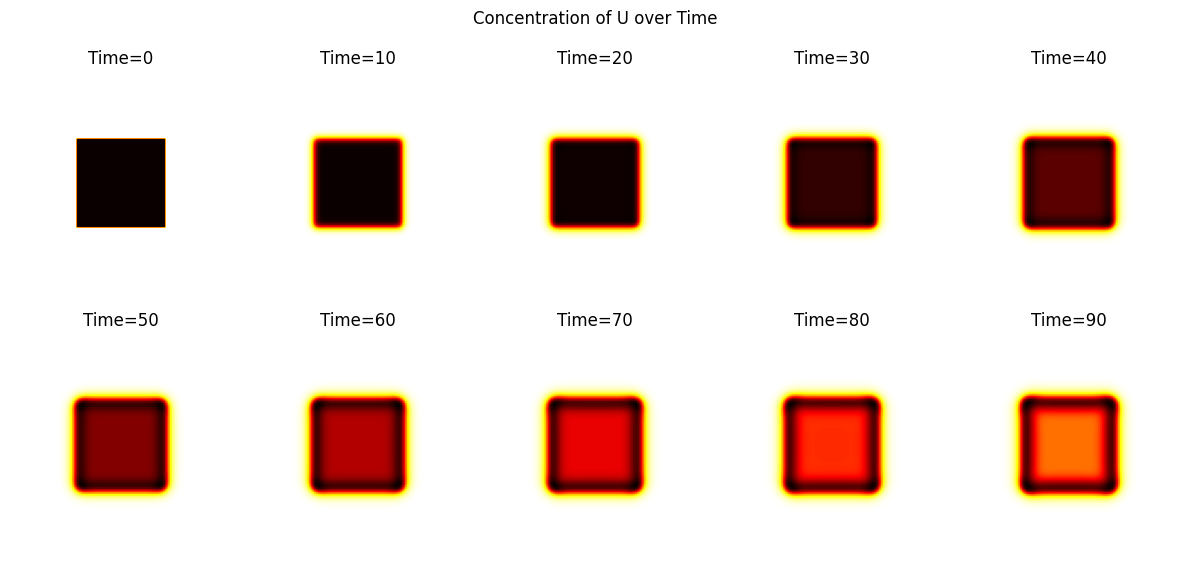

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
D_U = 0.16  # Diffusion coefficient for U
D_V = 0.08  # Diffusion coefficient for V
F = 0.04    # Feed rate for U
k = 0.06    # Kill rate for V

# Grid size
N = 100  # Size of the grid (N x N)
T = 100  # Total time steps

# Initialize concentrations
U = np.ones((N, N))  # Concentration of U
V = np.zeros((N, N))  # Concentration of V

# Set initial conditions
U[30:70, 30:70] = 0.5
V[30:70, 30:70] = 0.25

# Function to compute the Laplacian
def laplacian(Z):
    return (
        np.roll(Z, 1, axis=0) +
        np.roll(Z, -1, axis=0) +
        np.roll(Z, 1, axis=1) +
        np.roll(Z, -1, axis=1) - 
        4 * Z
    )

# Time evolution function
def update(UV, t):
    U = UV[:N*N].reshape((N, N))
    V = UV[N*N:].reshape((N, N))

    dUdt = D_U * laplacian(U) - U * V**2 + F * (1 - U)
    dVdt = D_V * laplacian(V) + U * V**2 - (F + k) * V
    
    return np.concatenate([dUdt.ravel(), dVdt.ravel()])

# Time vector
time_points = np.linspace(0, T, T)

# Initial conditions vector
initial_conditions = np.concatenate([U.ravel(), V.ravel()])

# Solve ODEs
solution = odeint(update, initial_conditions, time_points)

# Reshape solution for plotting
U_sol = solution[:, :N*N].reshape((T, N, N))
V_sol = solution[:, N*N:].reshape((T, N, N))

# Plotting the results at different time steps
plt.figure(figsize=(12, 6))
for i in range(0, T, T // 10):  # Plot every T/10 steps
    plt.subplot(2, 5, i // (T // 10) + 1)
    plt.imshow(U_sol[i], cmap='hot')
    plt.title(f'Time={i}')
    plt.axis('off')

plt.suptitle('Concentration of U over Time')
plt.tight_layout()
plt.show()

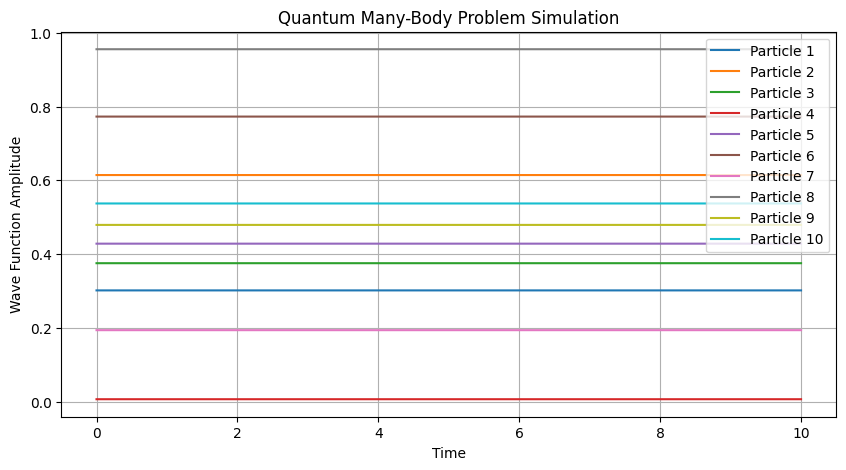

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
N = 10  # Number of particles
g = 1.0  # Interaction strength

# Define the mean-field dynamics
def quantum_many_body(t, y):
    # y contains the wave function amplitudes for each particle
    psi = y[:N]
    dpsi_dt = -1j * (g * np.sum(psi**2) * psi)  # Mean-field interaction term
    return np.concatenate([np.real(dpsi_dt), np.imag(dpsi_dt)])

# Initial conditions (random wave function)
initial_conditions = np.random.rand(N) + 1j * np.random.rand(N)

# Time span
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the ODEs
solution = solve_ivp(quantum_many_body, t_span, np.concatenate([np.real(initial_conditions), np.imag(initial_conditions)]), t_eval=t_eval)

# Plotting the results
plt.figure(figsize=(10, 5))
for i in range(N):
    plt.plot(solution.t, solution.y[i], label=f'Particle {i+1}')
plt.title('Quantum Many-Body Problem Simulation')
plt.xlabel('Time')
plt.ylabel('Wave Function Amplitude')
plt.legend()
plt.grid()
plt.show()

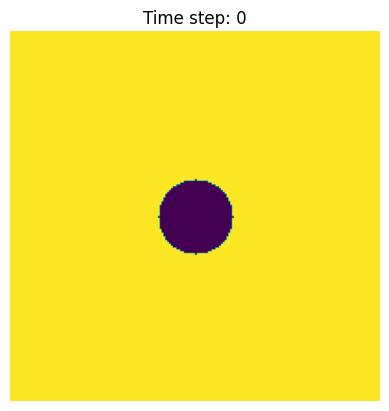

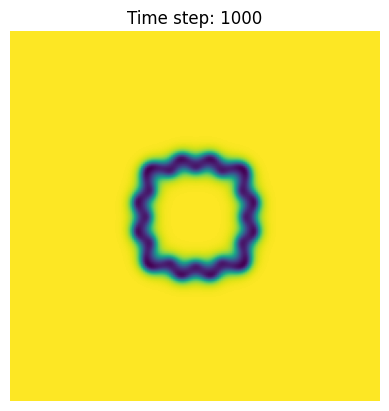

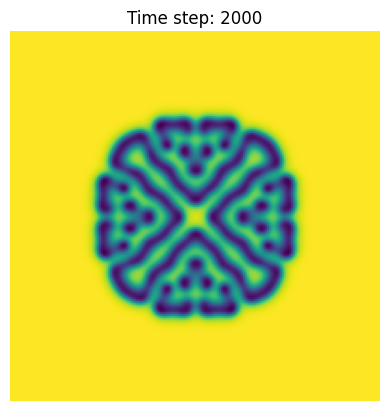

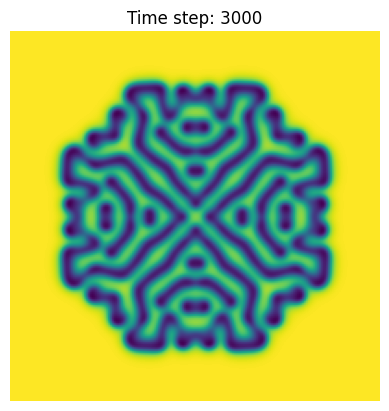

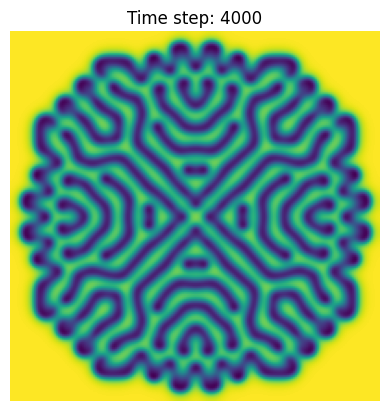

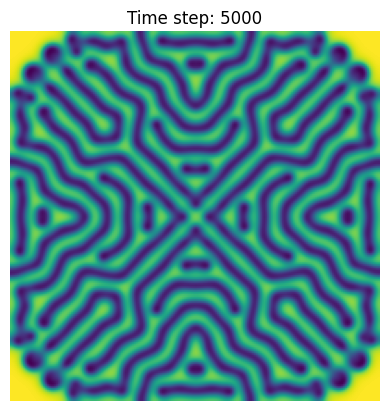

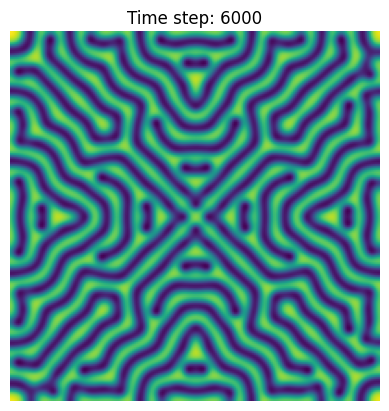

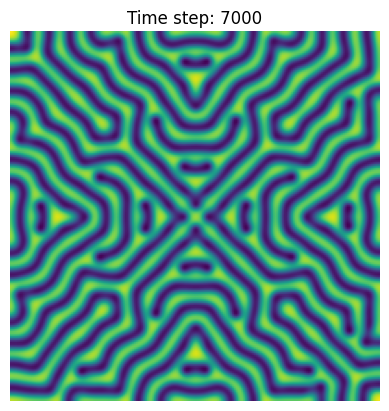

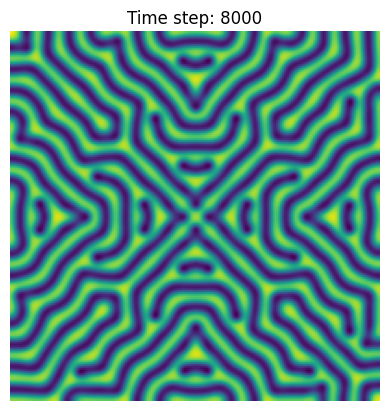

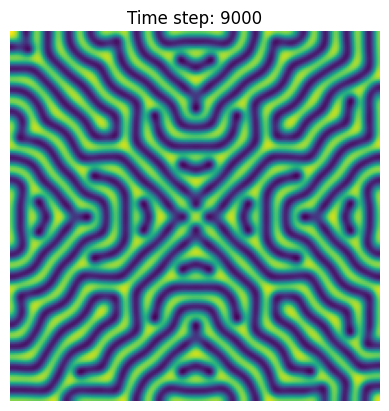

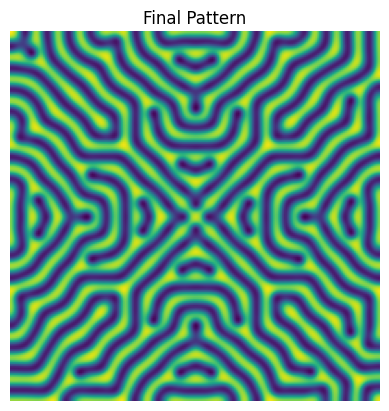

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace

# Parameters for the reaction-diffusion model
width, height = 200, 200  # Grid size
Du, Dv = 0.16, 0.08       # Diffusion coefficients
F, k = 0.035, 0.06        # Feed rate and kill rate
time_steps = 10000         # Number of time steps

# Initialize the grid with two chemicals: U (activator) and V (inhibitor)
U = np.ones((height, width))
V = np.zeros((height, width))

# Seed: Create a small disturbance in the center
r = 20  # Radius of the initial disturbance
center = (height // 2, width // 2)
y, x = np.ogrid[:height, :width]
mask = (x - center[1]) ** 2 + (y - center[0]) ** 2 <= r ** 2
V[mask] = 1.0

def update(U, V, Du, Dv, F, k):
    """Performs one time step of the Gray-Scott model."""
    laplace_u = laplace(U)  # Compute the Laplacian for U
    laplace_v = laplace(V)  # Compute the Laplacian for V

    # Reaction-diffusion equations
    dU = Du * laplace_u - U * V**2 + F * (1 - U)
    dV = Dv * laplace_v + U * V**2 - (F + k) * V

    # Update the concentrations
    U += dU
    V += dV

    return U, V

# Simulation loop
for i in range(time_steps):
    U, V = update(U, V, Du, Dv, F, k)
    if i % 1000 == 0:  # Plot at intervals
        plt.imshow(U, cmap='viridis')
        plt.title(f'Time step: {i}')
        plt.axis('off')
        plt.pause(0.01)

# Final plot
plt.imshow(U, cmap='viridis')
plt.title('Final Pattern')
plt.axis('off')
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters for the Gray-Scott model
D_U = 0.16   # Diffusion coefficient for U
D_V = 0.08   # Diffusion coefficient for V
F = 0.04     # Feed rate for U
k = 0.06     # Kill rate for V

# Grid size and time steps
N = 100      # Size of the grid (N x N)
T = 10000    # Total time steps

# Initialize concentrations
U = np.ones((N, N))   # Concentration of U
V = np.zeros((N, N))   # Concentration of V

# Set initial conditions in the center of the grid
U[N//4:N//4*3, N//4:N//4*3] = .5 
V[N//4:N//4*3, N//4:N//4*3] = .25 

# Function to compute the Laplacian
def laplacian(Z):
    return (
        np.roll(Z, +1, axis=0) +
        np.roll(Z, -1, axis=0) +
        np.roll(Z, +1, axis=1) +
        np.roll(Z, -1, axis=1) -
        4 * Z
    )

# Time evolution function for the reaction-diffusion system
def update(UV):
    U = UV[:N*N].reshape((N,N))
    V = UV[N*N:].reshape((N,N))

    dUdt = D_U * laplacian(U) - U * V**2 + F * (1 - U)
    dVdt = D_V * laplacian(V) + U * V**2 - (F + k) * V
    
    return np.concatenate([dUdt.ravel(), dVdt.ravel()])

# Time vector and initial conditions vector
time_points = np.linspace(0,T,T)
initial_conditions = np.concatenate([U.ravel(), V.ravel()])

# Solve ODEs using odeint 
solution = odeint(update, initial_conditions,time_points)

# Reshape solution for plotting 
U_sol = solution[:, :N*N].reshape((T,N,N))
V_sol = solution[:, N*N:].reshape((T,N,N))

# Plotting results at different time steps 
plt.figure(figsize=(12,6))
for i in range(0,T,T//10):  
    plt.subplot(2,5,i//(T//10)+1)
    plt.imshow(U_sol[i], cmap='hot')
    plt.title(f'Time={i}')
    plt.axis('off')

plt.suptitle('Concentration of U over Time')
plt.tight_layout()
plt.show()

TypeError: update() takes 1 positional argument but 2 were given